<a href="https://colab.research.google.com/github/shouwiz/CampusX/blob/main/end_to_end_Ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

In [61]:
df = pd.read_csv('placement.csv')
df

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [62]:
df.shape

(100, 4)

In [63]:
df = df.iloc[:,1:]
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


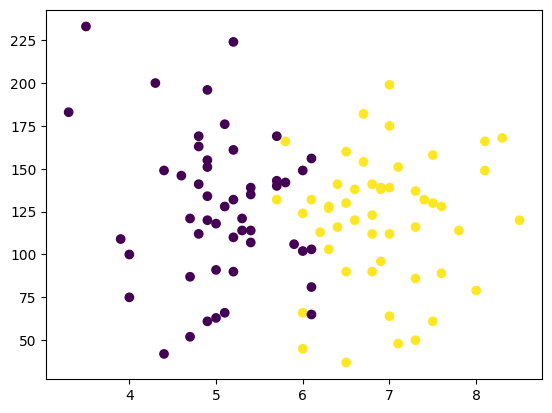

In [64]:
plt.scatter(df['cgpa'],df['iq'], c = df['placement'])

In [65]:
x = df.iloc[:, 0:2]
y = df.iloc[:, -1]

In [66]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [67]:
y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [68]:
print("shape of x :", x.shape)
print("shape of y :", y.shape)

shape of x : (100, 2)
shape of y : (100,)


In [80]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test, = train_test_split(x,y,test_size=0.1)

In [81]:
x_train

,cgpa,iq
30,7.6,128.0
34,4.8,163.0
4,5.8,142.0
9,5.1,66.0
45,6.0,66.0
...,...,...
61,7.3,137.0
36,5.7,140.0
17,3.3,183.0
94,4.7,52.0


In [82]:
x_test.head()

,cgpa,iq
42,7.6,89.0
35,6.8,90.0
1,5.9,106.0
33,6.0,149.0
73,4.9,61.0


In [83]:
y_train

,placement
30,1
34,0
4,0
9,0
45,1
...,...
61,1
36,0
17,0
94,0


In [84]:
y_test

,placement
42,1
35,1
1,0
33,0
73,0
10,1
88,0
72,1
98,1
7,0


In [85]:
from sklearn.preprocessing import StandardScaler

In [86]:
scaler = StandardScaler()

In [87]:
x_train = scaler.fit_transform(x_train)

In [88]:
x_train

array([[ 1.3978773 ,  0.03760136],
       [-1.02986274,  0.92815983],
       [-0.16281272,  0.39382475],
       [-0.76974773, -1.53995937],
       [ 0.01059728, -1.53995937],
       [ 0.87764729,  0.31749116],
       [-1.02986274,  0.36838022],
       [-1.02986274, -0.36951109],
       [-0.68304273,  0.13937947],
       [ 1.8314023 ,  1.00449342],
       [-1.02986274,  1.080827  ],
       [ 0.70423729, -0.36951109],
       [-0.94315773,  0.19026853],
       [ 0.09730228, -1.5654039 ],
       [-1.72350274, -0.67484542],
       [-1.72350274, -1.31095862],
       [-0.85645273, -0.90384617],
       [-0.94315773,  1.76782925],
       [ 0.96435229, -1.99796087],
       [ 0.61753229,  1.41160586],
       [-0.94315773,  0.6228255 ],
       [ 0.79094229,  0.31749116],
       [-0.76974773,  0.03760136],
       [ 0.09730228, -1.15829145],
       [ 0.87764729,  1.23349417],
       [-0.68304273, -0.42040014],
       [ 1.8314023 ,  0.57193644],
       [ 0.70423729,  0.36838022],
       [ 0.35741728,

In [89]:
x_test = scaler.fit_transform(x_test)
x_test

array([[ 1.59963608, -0.24252258],
       [ 0.78969376, -0.21258152],
       [-0.12149135,  0.26647543],
       [-0.02024856,  1.55394097],
       [-1.13391925, -1.08087224],
       [-0.02024856, -1.55992918],
       [-1.6401332 ,  1.55394097],
       [ 1.29590771,  0.56588602],
       [ 0.28347981,  0.17665225],
       [-1.03267646, -1.02099012]])

In [92]:
from sklearn.linear_model import LogisticRegression

In [93]:
log = LogisticRegression()

In [94]:
log.fit(x_train,y_train)

LogisticRegression()

In [97]:
log.predict(x_test)

array([1, 1, 0, 1, 0, 0, 0, 1, 1, 0])

In [98]:
y_test

,placement
42,1
35,1
1,0
33,0
73,0
10,1
88,0
72,1
98,1
7,0


In [99]:
from sklearn.metrics import accuracy_score

In [100]:
accuracy_score(y_test,y_pred)

0.8

<Axes: >

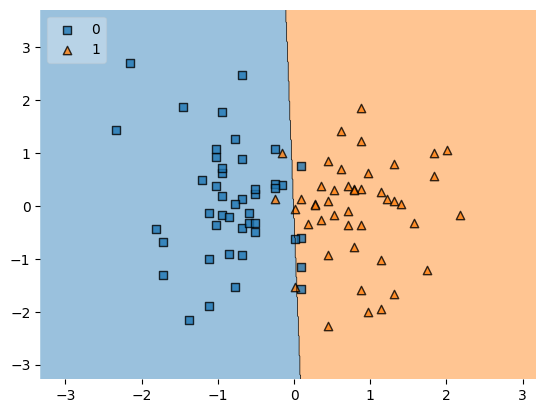

In [102]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_train, y_train.values, clf = log, legend=2)